In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

National Data

In [2]:
df_national = pd.read_csv("climdiv_national_year.csv")
df_national.head()

,year,temp,tempc
0,1895,50.337500,10.187500
1,1896,51.993333,11.107407
2,1897,51.556667,10.864815
3,1898,51.431667,10.795370
4,1899,51.009167,10.560648


In [3]:
df_national.tail()

,year,temp,tempc
120,2015,54.401667,12.445370
121,2016,54.915000,12.730556
122,2017,54.551667,12.528704
123,2018,53.518333,11.954630
124,2019,52.671667,11.484259


In [4]:
list(df_national.columns)

['year', 'temp', 'tempc']

In [5]:
df_national.describe()

,year,temp,tempc
count,125.000000,125.000000,125.000000
mean,1957.000000,52.216533,11.231407
std,36.228442,0.987160,0.548422
min,1895.000000,50.062500,10.034722
25%,1926.000000,51.550000,10.861111
50%,1957.000000,51.978333,11.099074
75%,1988.000000,52.865833,11.592130
max,2019.000000,55.284167,12.935648


In [6]:
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    125 non-null    int64  
 1   temp    125 non-null    float64
 2   tempc   125 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [7]:
df_national.dtypes

year       int64
temp     float64
tempc    float64
dtype: object

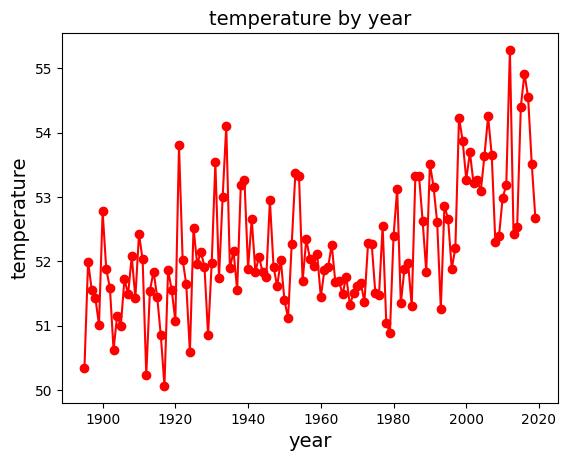

In [8]:
plt.plot(df_national['year'], df_national['temp'], color='red', marker='o')
plt.title('temperature by year', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('temperature', fontsize=14)
plt.grid(False)
plt.show()

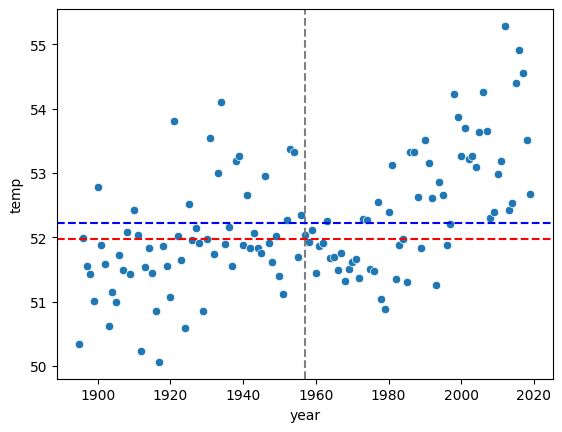

In [9]:
sns.scatterplot(
    data = df_national,
    x = 'year' , y = 'temp',
    # hue = 'continent'
)

plt.axvline( df_national['year'].median() , color = 'gray' , ls = "--")
plt.axhline( df_national['temp'].median() , color = 'r' , ls = "--")
plt.axhline( df_national['temp'].mean() , color = 'b' , ls = "--")

# plt.annotate(
#     text = "HH\nRich and Crowded",
#     xy = (100000000,10000),
#     ha = 'center'
# )

# plt.annotate(
#     text = "LL\nPoor and Not-crowded",
#     xy = (900000,1000),
#     ha = 'center'
# )

In [10]:
df_county = pd.read_csv("climdiv_county_year.csv")

In [12]:
df_county.dtypes

fips       int64
year       int64
temp     float64
tempc    float64
dtype: object

In [13]:
df_county["fips"] = df_county["fips"].astype(str)
df_county.insert(1,"countycode", df_county["fips"])
df_county["countycode"] = df_county["countycode"].str.strip().str[-3:]
df_county

,fips,countycode,year,temp,tempc
0,1001,001,1895,62.633333,17.018519
1,1001,001,1896,65.341667,18.523148
2,1001,001,1897,65.150000,18.416667
3,1001,001,1898,63.816667,17.675926
4,1001,001,1899,63.925000,17.736111
...,...,...,...,...,...
388370,56045,045,2015,46.633333,8.129630
388371,56045,045,2016,47.250000,8.472222
388372,56045,045,2017,45.650000,7.583333
388373,56045,045,2018,43.725000,6.513889


## County Model Repo Excerpts

Temperature change estimates for each of the Lower 48 states /data/processed/model_state.csv. The code to produce this file is found in /analysis/model_temperature_change.Rmd. Each row has the following variables

fips A five digit fips code for the county

CTYNAME the name of the county

STNAME the name of the state

Annual Estimate of annual average temperature change in Celsius for the county, 1895-2019

Fall temperature change in September, October and November

Spring temperature change in March, April and May

Summer temperature change in June, July and August

Winter temperature change in December and the following January and February

max_warming_season the season where temperatures are increasing fastest

In [16]:
df_county_model = pd.read_csv("model_county.csv", encoding='latin-1')

In [17]:
df_county_model

,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,CTYNAME,STNAME
0,1001,-0.248564,-0.073735,-0.307132,0.270039,Winter,-0.079968,Autauga County,Alabama
1,1003,0.049693,0.060035,-0.007407,0.444586,Winter,0.142995,Baldwin County,Alabama
2,1005,0.179485,0.127492,-0.061220,0.891132,Winter,0.300250,Barbour County,Alabama
3,1007,-0.398166,-0.210074,-0.576085,0.530794,Winter,-0.152667,Bibb County,Alabama
4,1009,0.308868,0.333460,0.169764,0.735788,Winter,0.385534,Blount County,Alabama
...,...,...,...,...,...,...,...,...,...
3102,56037,1.237333,1.709785,1.424254,2.144437,Winter,1.660667,Sweetwater County,Wyoming
3103,56039,0.265877,1.183083,0.692148,1.308981,Winter,0.874765,Teton County,Wyoming
3104,56041,1.056832,1.351661,1.272762,1.376028,Winter,1.292878,Uinta County,Wyoming
3105,56043,0.834173,1.287097,0.977354,1.935859,Winter,1.271704,Washakie County,Wyoming


In [18]:
df_county_model.dtypes

fips                    int64
Fall                  float64
Spring                float64
Summer                float64
Winter                float64
max_warming_season     object
Annual                float64
CTYNAME                object
STNAME                 object
dtype: object

Need to adjust FIPS codes.

In [19]:
df_county_model["fips"] = df_county_model["fips"].astype(str)
df_county_model.insert(1,"countycode", df_county_model["fips"])
df_county_model["countycode"] = df_county_model["countycode"].str.strip().str[-3:]
df_county_model

,fips,countycode,Fall,Spring,Summer,Winter,max_warming_season,Annual,CTYNAME,STNAME
0,1001,001,-0.248564,-0.073735,-0.307132,0.270039,Winter,-0.079968,Autauga County,Alabama
1,1003,003,0.049693,0.060035,-0.007407,0.444586,Winter,0.142995,Baldwin County,Alabama
2,1005,005,0.179485,0.127492,-0.061220,0.891132,Winter,0.300250,Barbour County,Alabama
3,1007,007,-0.398166,-0.210074,-0.576085,0.530794,Winter,-0.152667,Bibb County,Alabama
4,1009,009,0.308868,0.333460,0.169764,0.735788,Winter,0.385534,Blount County,Alabama
...,...,...,...,...,...,...,...,...,...,...
3102,56037,037,1.237333,1.709785,1.424254,2.144437,Winter,1.660667,Sweetwater County,Wyoming
3103,56039,039,0.265877,1.183083,0.692148,1.308981,Winter,0.874765,Teton County,Wyoming
3104,56041,041,1.056832,1.351661,1.272762,1.376028,Winter,1.292878,Uinta County,Wyoming
3105,56043,043,0.834173,1.287097,0.977354,1.935859,Winter,1.271704,Washakie County,Wyoming


In [20]:
state_codes = {
    'Washington': '53', 'Delaware': '10', 'District of Columbia': '11', 'Wisconsin': '55', 'West Virginia': '54', 'Hawaii': '15',
    'Florida': '12', 'Wyoming': '56', 'Puerto Rico': '72', 'New Jersey': '34', 'New Mexico': '35', 'Texas': '48',
    'Louisiana': '22', 'North Carolina': '37', 'North Dakota': '38', 'Nebraska': '31', 'Tennessee': '47', 'New York': '36',
    'Pennsylvania': '42', 'Alaska': '02', 'Nevada': '32', 'New Hampshire': '33', 'Virginia': '51', 'Colorado': '08',
    'California': '06', 'Alabama': '01', 'Arkansas': '05', 'Vermont': '50', 'Illinois': '17', 'Georgia': '13',
    'Indiana': '18', 'Iowa': '19', 'Massachusetts': '25', 'Arizona': '04', 'Idaho': '16', 'Connecticut': '09',
    'Maine': '23', 'Maryland': '24', 'Oklahoma': '40', 'Ohio': '39', 'Utah': '49', 'Missouri': '29',
    'Minnesota': '27', 'Michigan': '26', 'Rhode Island': '44', 'Kansas': '20', 'Montana': '30', 'Mississippi': '28',
    'South Carolina': '45', 'Kentucky': '21', 'Oregon': '41', 'South Dakota': '46'
}


df_county_model.insert(1,"statecode", df_county_model["STNAME"].map(state_codes))
df_county_model

,fips,statecode,countycode,Fall,Spring,Summer,Winter,max_warming_season,Annual,CTYNAME,STNAME
0,1001,01,001,-0.248564,-0.073735,-0.307132,0.270039,Winter,-0.079968,Autauga County,Alabama
1,1003,01,003,0.049693,0.060035,-0.007407,0.444586,Winter,0.142995,Baldwin County,Alabama
2,1005,01,005,0.179485,0.127492,-0.061220,0.891132,Winter,0.300250,Barbour County,Alabama
3,1007,01,007,-0.398166,-0.210074,-0.576085,0.530794,Winter,-0.152667,Bibb County,Alabama
4,1009,01,009,0.308868,0.333460,0.169764,0.735788,Winter,0.385534,Blount County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...
3102,56037,56,037,1.237333,1.709785,1.424254,2.144437,Winter,1.660667,Sweetwater County,Wyoming
3103,56039,56,039,0.265877,1.183083,0.692148,1.308981,Winter,0.874765,Teton County,Wyoming
3104,56041,56,041,1.056832,1.351661,1.272762,1.376028,Winter,1.292878,Uinta County,Wyoming
3105,56043,56,043,0.834173,1.287097,0.977354,1.935859,Winter,1.271704,Washakie County,Wyoming


In [21]:
df_county_model["statecode"].isnull().sum()

0

In [22]:
df_county_model.insert(3,"newFIPS", df_county_model["statecode"]+df_county_model["countycode"])
df_county_model

,fips,statecode,countycode,newFIPS,Fall,Spring,Summer,Winter,max_warming_season,Annual,CTYNAME,STNAME
0,1001,01,001,01001,-0.248564,-0.073735,-0.307132,0.270039,Winter,-0.079968,Autauga County,Alabama
1,1003,01,003,01003,0.049693,0.060035,-0.007407,0.444586,Winter,0.142995,Baldwin County,Alabama
2,1005,01,005,01005,0.179485,0.127492,-0.061220,0.891132,Winter,0.300250,Barbour County,Alabama
3,1007,01,007,01007,-0.398166,-0.210074,-0.576085,0.530794,Winter,-0.152667,Bibb County,Alabama
4,1009,01,009,01009,0.308868,0.333460,0.169764,0.735788,Winter,0.385534,Blount County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...
3102,56037,56,037,56037,1.237333,1.709785,1.424254,2.144437,Winter,1.660667,Sweetwater County,Wyoming
3103,56039,56,039,56039,0.265877,1.183083,0.692148,1.308981,Winter,0.874765,Teton County,Wyoming
3104,56041,56,041,56041,1.056832,1.351661,1.272762,1.376028,Winter,1.292878,Uinta County,Wyoming
3105,56043,56,043,56043,0.834173,1.287097,0.977354,1.935859,Winter,1.271704,Washakie County,Wyoming
